In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.

C:\Users\admin\anaconda3\envs\bs\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
iris = load_iris()
df = pd.DataFrame(data  = iris.data,
                 columns =['sepal length','sepal width','petal length','petal width'])
df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
kmeans = KMeans(n_clusters=3 ,init='k-means++',max_iter = 300, random_state= 0).fit(df)
print(kmeans.labels_)
df['cluster'] = kmeans.labels_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# df['target'] = iris.data

pca = PCA(n_components =2)
iris_scaled = StandardScaler().fit_transform(iris.data)
pca_transformed = pca.fit_transform(iris_scaled)
iris_pca.shape

(150, 2)

In [14]:
df['pca_x'] = pca_transformed[:,0]
df['pca_y'] = pca_transformed[:,1]
df.head()

,sepal length,sepal width,petal length,petal width,pca_x,pca_y
0,5.1,3.5,1.4,0.2,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,-2.389842,0.646835


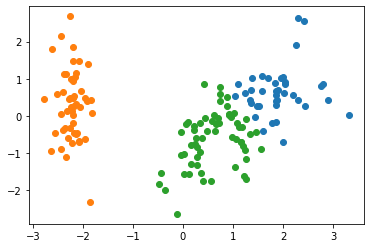

In [21]:
mark0_ind = df[df.cluster == 0].index
mark1_ind = df[df.cluster == 1].index
mark2_ind = df[df.cluster == 2].index

plt.scatter(x=df.loc[mark0_ind,'pca_x'],
           y = df.loc[mark0_ind,'pca_y'])
plt.scatter(x=df.loc[mark1_ind,'pca_x'],
           y = df.loc[mark1_ind,'pca_y'])
plt.scatter(x=df.loc[mark2_ind,'pca_x'],
           y = df.loc[mark2_ind,'pca_y'])

In [24]:
df_iris = df.drop(['pca_x','pca_y'],axis=1)
df_iris

,sepal length,sepal width,petal length,petal width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [31]:
from sklearn.metrics import silhouette_samples, silhouette_score
score_samples = silhouette_samples(iris.data, df_iris['cluster'])
print(score_samples)
print()
print(score_samples.sum())

df_iris['silhouette_coeff'] = score_samples
df_iris

[ 0.85304087  0.81541817  0.82923413  0.80482756  0.84937489  0.7487223
  0.82155939  0.85393464  0.75180407  0.82522845  0.80339039  0.83586479
  0.81045059  0.74587121  0.70333902  0.64477336  0.77606536  0.85110724
  0.70756279  0.82046384  0.78441655  0.82604678  0.79296475  0.79415343
  0.77490836  0.79857727  0.8334923   0.8421391   0.84375144  0.81770968
  0.81506375  0.79922694  0.76305204  0.72283397  0.82870647  0.83227265
  0.79445598  0.84193318  0.76829533  0.85039544  0.84948047  0.63837494
  0.78637151  0.80029895  0.74718883  0.8096583   0.81356301  0.81888713
  0.81845537  0.85211936  0.00592231  0.34816755  0.112723    0.59478035
  0.33979675  0.59262009  0.25164571  0.27103635  0.30817802  0.57981794
  0.38061943  0.57926585  0.5476866   0.47246024  0.56429197  0.28013466
  0.55743     0.60755919  0.4581128   0.61105184  0.32253128  0.57962485
  0.30616561  0.48690317  0.4781781   0.34880951  0.07981356  0.15681382
  0.54506023  0.50850999  0.59478242  0.5643748   0.

,sepal length,sepal width,petal length,petal width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.853041
1,4.9,3.0,1.4,0.2,1,0.815418
2,4.7,3.2,1.3,0.2,1,0.829234
3,4.6,3.1,1.5,0.2,1,0.804828
4,5.0,3.6,1.4,0.2,1,0.849375
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0.430780
146,6.3,2.5,5.0,1.9,2,0.105215
147,6.5,3.0,5.2,2.0,0,0.321818
148,6.2,3.4,5.4,2.3,0,0.348138


In [33]:
# 실루엣 계수의 평균 ( 1 에 가까울수록 best)
df_iris.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.432875
1    0.798217
2    0.415004
Name: silhouette_coeff, dtype: float64

#### 여러개의 클러스터링 계수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화

In [ ]:
#### 여러개의 클러스터링 계수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화


In [34]:
# make_blobs를 통해 clustering을 위한 4개의 클러스터 중심의 500개 2차운 데이터 셋 생성
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples = 500, n_features =2, centers=4,cluster_std=1,center_box =(-10.0,10.0),
                shuffle = True, random_state =1)
visualize_silhouette([2,3,4,5],x)

NameError: name 'visualize_silhouette' is not defined